# Assignment 1: How much does your car cost?

## Data

The retail price of 2005 General Motors cars can be found in `car_data.csv`.

**Data Descriptions**:

||Features|Descriptions
|-|-|-|
|1| Price   | suggested retail price of the used 2005 GM car in excellent condition|
|2| Mileage | number of miles the car has been driven|
|3| Make    | manufacturer of the car such as Saturn, Pontiac, and Chevrolet|
|4| Model   | specific models for each car manufacturer such as Ion, Vibe, Cavalier|
|5| Trim (of car)| specific type of car model such as SE Sedan 4D, Quad Coupe 2D |         
|6| Type    | body type such as sedan, coupe, etc |
|7| Cylinder| number of cylinders in the engine    |    
|8| Liter   | a more specific measure of engine size|     
|9| Doors   | number of doors           |
|10| Cruise | indicator variable representing whether the car has cruise control (1 = cruise)|
|11| Sound  | indicator variable representing whether the car has upgraded speakers (1 = upgraded)|
|12| Leather| indicator variable representing whether the car has leather seats (1 = leather)|

#### 1. Import necessary libraries

In [85]:
# Libraries to load data
import pandas as pd
import numpy as np
# Libraries to visualize
import matplotlib.pyplot as plt
import seaborn as sns
# Libraries to create and evaluate models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#### 2. Load the data from csv file to `pandas` dataframe

In [2]:
df = pd.read_csv('car_data.csv')

#### 3. Inspect the first 5 rows of the dataframe

In [3]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


#### 4. Check the number of rows and columns

In [4]:
df.shape

(804, 12)

#### 5. Get some information about the dataset via `.info()`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


#### 6. Check number of missing values per columns

In [6]:
print(len(df))
print(len(df.columns))

804
12


In [7]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

In [8]:
df.memory_usage().sum()

77312

#### 7. Get table of distributions each features and visualize this distribution.

In [9]:
df.describe()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Sound,Leather
count,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000
mean,21343.143767,19831.934080,5.268657,3.037313,3.527363,0.752488,0.679104,0.723881
std,9884.852801,8196.319707,1.387531,1.105562,0.850169,0.431836,0.467111,0.447355
min,8638.930895,266.000000,4.000000,1.600000,2.000000,0.000000,0.000000,0.000000
25%,14273.073870,14623.500000,4.000000,2.200000,4.000000,1.000000,0.000000,0.000000
50%,18024.995019,20913.500000,6.000000,2.800000,4.000000,1.000000,1.000000,1.000000
75%,26717.316636,25213.000000,6.000000,3.800000,4.000000,1.000000,1.000000,1.000000
max,70755.466717,50387.000000,8.000000,6.000000,4.000000,1.000000,1.000000,1.000000


In [10]:
df[['Make','Model','Trim','Type']].describe()

,Make,Model,Trim,Type
count,804,804,804,804
unique,6,32,47,5
top,Chevrolet,Cavalier,Sedan 4D,Sedan
freq,320,60,170,490


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


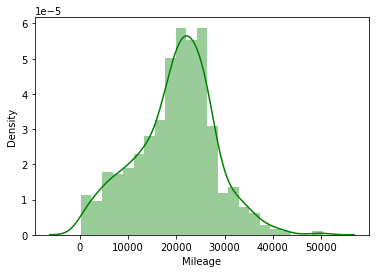

In [11]:
sns.distplot(df['Mileage'], color='g')
plt.show()

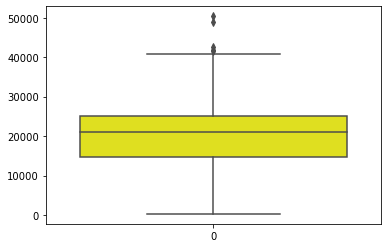

In [12]:
sns.boxplot(data=df['Mileage'], color='yellow')
plt.show()

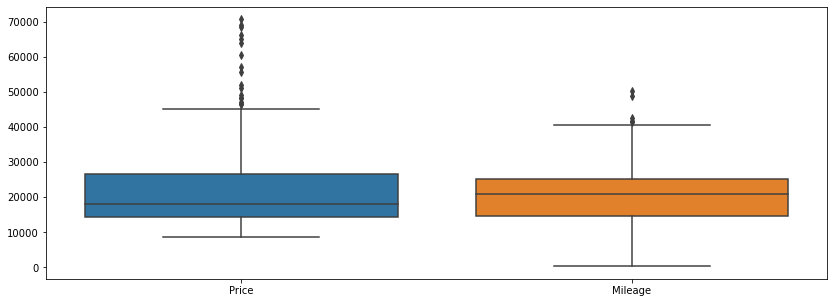

In [38]:
plt.figure(figsize=(14,5))
sns.boxplot(data=df.drop(columns=['Liter','Cylinder','Doors','Cruise','Sound','Leather']))
plt.show()

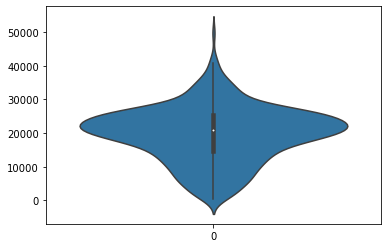

In [39]:
sns.violinplot(data=df['Mileage'])

#### 8. Visualize correlation coefficient between features and label.

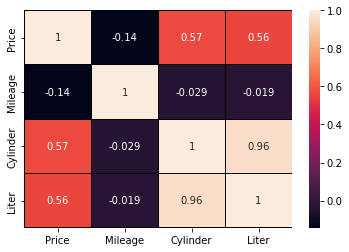

In [13]:
sns.heatmap(df.drop(columns=['Doors','Cruise','Sound','Leather']).corr(), annot=True, linewidths=0.01, linecolor='black')
plt.show()

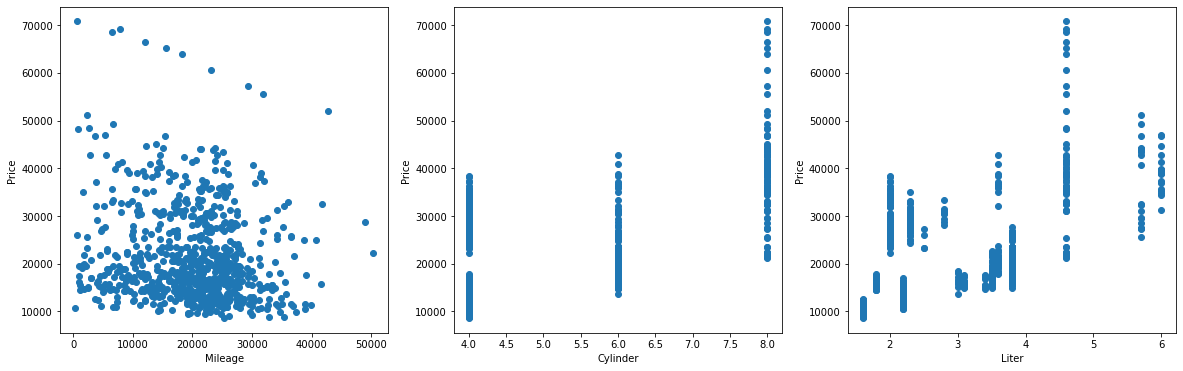

In [29]:
fig, ax = plt.subplots(1,3, figsize=(20,6))
ax[0].scatter(df.Mileage, df.Price)                        # ax ~ plot
ax[0].set(xlabel='Mileage', ylabel='Price')
ax[1].scatter(df.Cylinder, df.Price)
ax[1].set(xlabel='Cylinder', ylabel='Price')
ax[2].scatter(df.Liter, df.Price)
ax[2].set(xlabel='Liter', ylabel='Price')
plt.show()

#### 9. Split the dataset into train and test set with ratio 90:10 with random seeds of 42.

In [67]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(df[['Cylinder','Mileage']], df.Price, test_size=0.1, random_state=42)   # auto if not write train_size/test_size is train/test=0.75/0.25

In [72]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((723, 2), (723,), (81, 2), (81,))

In [73]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [74]:
prediction2 = model.predict(X_test)
prediction2

array([16952.57191393, 15855.97927401, 14966.80160635, 25589.62491013,
       24137.12193569, 14286.08570605, 14863.31843346, 15920.73102815,
       14217.89448229, 17004.31350038, 23790.18413062, 16213.53457226,
       15764.60901586, 24409.5877464 , 16574.08071365, 24061.90223054,
       24251.22260176, 31588.7542505 , 15880.50418782, 21049.22592836,
       21982.36899029, 23706.29098034, 22873.34116384, 15691.1838166 ,
       22831.31981762, 24909.05855198, 26460.70797675, 22558.85400691,
       15702.54902056, 23396.58917244, 15669.94883026, 25959.29312312,
       17135.46197238, 18075.93260002, 25135.31583607, 24796.45330749,
       15358.75160079, 24313.1330549 , 24258.55016747, 16557.33199203,
       23932.24918011, 14283.24440506, 17644.05484956, 23817.2512611 ,
       15503.35886696, 18079.5216118 , 21937.8054274 , 23041.72563303,
       24000.73948818, 23372.81196942, 25911.88825924, 26017.16593802,
       13962.62601968, 17331.96036715, 18965.11026768, 15133.98973828,
      

In [75]:
pd.DataFrame({'auto': prediction2,
             'groundtruth': y_test
             })

,auto,groundtruth
192,16952.571914,11302.902985
717,15855.979274,29114.544506
168,14966.801606,10777.052537
522,25589.624910,20677.593819
536,24137.121936,15253.868566
...,...,...
596,15561.231682,12465.508523
752,15996.548902,13991.040057
327,15972.472615,14191.882277
758,15216.537009,13811.155022


#### 10. Find the best combination of factors to predict price with linear regression classifier.

E.g:
- Use mileage to find the linear regression equation.
- Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [76]:
from sklearn.linear_model import LinearRegression

#### --> Use mileage to find the linear regression equation.

In [77]:
model = LinearRegression()
model.fit(df[['Mileage']], df['Price'])         # fit(feature, label)

LinearRegression()

In [78]:
prediction = model.predict(df[['Mileage']])
prediction

array([23346.26795261, 23188.58421306, 22487.97845123, 21945.22894945,
       21343.13239471, 20928.393106  , 20869.73613505, 20802.79817996,
       20620.44400851, 20050.43626729, 22998.46661899, 22165.36511101,
       21895.02548313, 21348.65305079, 20734.65258136, 20664.60925723,
       20622.68677505, 20273.16023639, 19089.32454624, 18784.1357768 ,
       23217.05009602, 22939.80964804, 22286.64702447, 21916.59054598,
       21502.54133928, 21406.10237822, 21073.65536935, 20866.28572499,
       20543.15482326, 20409.2789131 , 22046.49848459, 21963.68864325,
       21633.82944191, 20951.51085337, 20691.00489415, 20548.33043835,
       20414.97208969, 20144.63246181, 20089.94346243, 19649.4986188 ,
       24248.37766171, 23033.14324005, 21600.70550537, 21384.53731538,
       21004.12960672, 20649.59997348, 20444.64561617, 20442.57537014,
       20371.49692299, 19963.31341338, 21770.81072113, 21695.93682291,
       21389.71293046, 21290.51364135, 21286.8907108 , 20664.26421622,
      

In [79]:
## Series:
pd.Series(prediction)

0      23346.267953
1      23188.584213
2      22487.978451
3      21945.228949
4      21343.132395
           ...     
799    21964.723766
800    21470.280005
801    21230.649027
802    20282.648864
803    18612.132836
Length: 804, dtype: float64

In [80]:
## DataFrame:
pd.DataFrame({'Result': prediction,
             })

,Result
0,23346.267953
1,23188.584213
2,22487.978451
3,21945.228949
4,21343.132395
...,...
799,21964.723766
800,21470.280005
801,21230.649027
802,20282.648864


#### --> Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.

In [82]:
model_3 = LinearRegression()
model_3.fit(df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']], df['Price'])         # fit(feature, label)

LinearRegression()

In [83]:
prediction_3 = model_3.predict(df[['Mileage','Cylinder','Liter','Doors','Cruise','Sound','Leather']])
prediction_3

array([27150.72763886, 23646.21650049, 22956.87055338, 24416.63914856,
       27173.58083333, 21422.35014909, 21364.6358861 , 21298.77372716,
       26462.50716369, 23907.86504996, 25059.33929914, 22245.83174111,
       21979.83688784, 24791.60712245, 24187.47458718, 20769.19534764,
       22721.74190008, 23733.39913569, 19219.22789061, 22268.30559482,
       23280.61452701, 26357.19138006, 25714.52608685, 27344.21226219,
       23587.45584498, 26841.92842632, 23165.4627338 , 22961.42583934,
       23999.05449329, 22511.76383149, 21971.4313383 , 21889.95237878,
       24914.75614297, 26237.1987418 , 25980.87951497, 22491.13643802,
       23715.48770754, 20100.13123466, 22040.11644751, 22962.31657548,
       29481.07981768, 26291.58081103, 21532.80293955, 23313.90418134,
       26288.97183066, 20596.9831399 , 20395.32271509, 20393.2857411 ,
       20323.34963418, 23271.08788249, 23693.96957793, 21626.503743  ,
       24674.56296022, 21227.59633702, 21224.03163254, 25954.56860096,
      

In [84]:
## DataFrame:
pd.DataFrame({'Result_3': prediction_3,
             })

,Result_3
0,27150.727639
1,23646.216500
2,22956.870553
3,24416.639149
4,27173.580833
...,...
799,24514.542727
800,22034.250164
801,21798.470425
802,20865.706086


#### 11. Evaluate your model performance using R-squared Error.

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [92]:
r2_score(y_test, prediction2)

0.2314711218692721

#### 12. Visualize the actual prices and predicted prices of the test set.

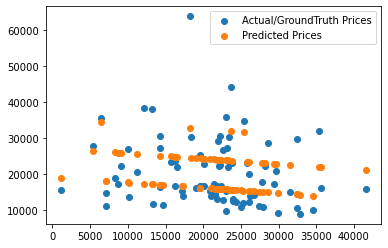

In [94]:
plt.scatter(X_test.Mileage, y_test, label='Actual/GroundTruth Prices')
plt.scatter(X_test.Mileage, prediction2, label='Predicted Prices')
plt.legend()                                                                       # để dán nhãn đồ thị
plt.show()